In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%precision 4

'%.4f'

In [111]:
# AMM for k = x * y
# Override mint and redeem functions for custom functionality

class Amm:

    x = 0
    y = 0
    
    x_name = ""
    y_name = ""
    z_name = ""
    
    init = False
    x_init = 0
    y_init = 0

    def __init__(self, x_name, y_name, z_name):
        self.x_name = x_name
        self.y_name = y_name
        self.z_name = z_name

    # Helper functions

    def reset(self):
        self.x = 0
        self.y = 0
        self.amm_init = dict(amm)
        self.init = False

    def zbtc_supply(self):
        return self.x + self.y

    def get_x_ratio(self):
        return self.x / (self.x + self.y)
    
    def get_x_exrate(self):
        return self.x / self.y 

    def get_k(self):
        return self.x * self.y

    def get_init_k(self):
        return self.x_init * self.y_init

    def print_amm_state(self):
        print("------------")
        print("AMM state:")
        print("{x_name}: {x}, {y_name}: {y}".format(x_name = self.x_name, x = self.x, y_name = self.y_name, y = self.y))
        print("ratio: " + str(self.get_x_ratio()))
        print("{x_name} price: {price} {y_name}".format(x_name = self.x_name, price = self.get_x_exrate(), y_name = self.y_name))
        print("k = {k}".format(k = self.get_k()))
        print("------------")


    def plot_amm(self):
        fig = plt.figure()
        xs = np.arange(0, self.x)
        ys = [self.get_k() / x for x in xs]
        plt.plot(x, y)

        y_init = [self.get_init_k() / x for x in x]
        plt.plot(x, y_init)
        plt.show()
        
        
    ## MINT FUNCTIONS
    def mint(self, x, y):
        self.x += x
        self.y += y
        if(self.init == False):
            self.init = True
            self.x_init = self.x
            self.y_init = self.y
        return x + y
    
    def redeem(self, z):
        x_redeem = z * self.get_x_ratio()
        y_redeem = z - x_redeem
        
        self.x -= x_redeem
        self.y -= y_redeem

        redeemed =  (x_redeem, y_redeem)
        print("Redeem: {z} {z_name} for {redeemed}".format(z = z, z_name = self.z_name, redeemed = redeemed))
        return redeemed
    
    def swap_x(self, x):
        y_return = self.get_x_exrate() * x
        self.x += x
        self.y -= y_return
        return y_return
        
    def swap_y(self, y):
        x_return = 1 / self.get_x_exrate() * y
        self.y += y
        self.x -= x_return
        return x_return
    
    def get_x_slippage(self, x):
        y_return = self.get_x_exrate() * x
        x_new = self.x + x
        y_new = self.y - y_return
        x_price_new = x_new / y_new
        return (x_price_new / self.get_x_exrate()) - 1
        

In [120]:
pamm = Amm("ibtc", "sbtc", "zbtc")

pamm.mint(100,100)
pamm.print_amm_state()

print(pamm.swap_x(2))
pamm.print_amm_state()
print(pamm.swap_y(2))
pamm.print_amm_state()

------------
AMM state:
ibtc: 100, sbtc: 100
ratio: 0.5
ibtc price: 1.0 sbtc
k = 10000
------------
2.0
------------
AMM state:
ibtc: 102, sbtc: 98.0
ratio: 0.51
ibtc price: 1.0408163265306123 sbtc
k = 9996.0
------------
1.9215686274509802
------------
AMM state:
ibtc: 100.07843137254902, sbtc: 100.0
ratio: 0.5001960015680126
ibtc price: 1.0007843137254901 sbtc
k = 10007.843137254902
------------


In [114]:
print(pamm.get_x_slippage(1))


0.021515064836003184


In [314]:
amm_init

{'sbtc': 0, 'ibtc': 0}

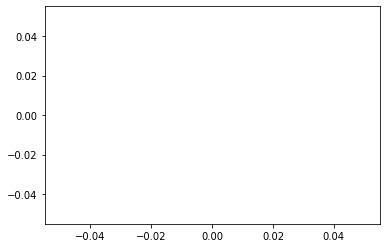

In [315]:
fig = plt.figure()
if amm["ibtc"] > 1:
    x = np.arange(1, amm["ibtc"])
else: 
    x = np.arange(0.01, amm["ibtc"], 0.01)
y = [get_k() / x for x in x]
plt.plot(x, y)

y_init = [get_init_k() / x for x in x]
plt.plot(x, y_init)

plt.show()